<h2>Attempting to visualize decision tree with multiple classes</h2>

In [20]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import colors

In [36]:
# sampling from a normal distribution N(0,1) for k=5 classes
X = []
y = []

n_samples = 100
for i in range(n_samples):
    X.append([np.random.normal(0,1), np.random.normal(0,1)])
    y.append(np.random.randint(0,5))

X = np.array(X)
y = np.array(y)

In [37]:
X.shape

(100, 2)

In [38]:
y.shape

(100,)

In [39]:
y

array([0, 1, 3, 0, 2, 0, 3, 3, 1, 2, 3, 0, 2, 1, 2, 4, 0, 3, 3, 0, 0, 2,
       2, 0, 3, 3, 3, 3, 0, 1, 3, 2, 4, 1, 4, 3, 2, 1, 4, 3, 2, 4, 1, 1,
       0, 1, 2, 3, 2, 2, 0, 3, 3, 4, 4, 2, 0, 1, 4, 3, 4, 0, 4, 3, 1, 3,
       2, 0, 3, 1, 3, 0, 0, 0, 3, 0, 0, 2, 2, 2, 2, 0, 4, 3, 2, 3, 0, 3,
       1, 1, 1, 2, 4, 4, 0, 1, 4, 0, 3, 2])

In [40]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X, y)
print(f"train accuracy = {model.score(X, y)}")

train accuracy = 0.89


In [41]:
x_min = np.min(X[:,0]) - 0.2
y_min = np.min(X[:,1]) - 0.2
x_max = np.max(X[:,0]) + 0.2
y_max = np.max(X[:,1]) + 0.2
plot_step_coarser = 0.1
    
xx_generator, yy_generator = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
grid_points = np.c_[xx_generator.ravel(), yy_generator.ravel()]
print(grid_points.shape)
grid_pred = model.predict(grid_points)

(2703, 2)


In [42]:
X[0]

array([-0.52609093, -1.44794843])

In [43]:
grid_pred

array([2, 2, 2, ..., 2, 2, 2])

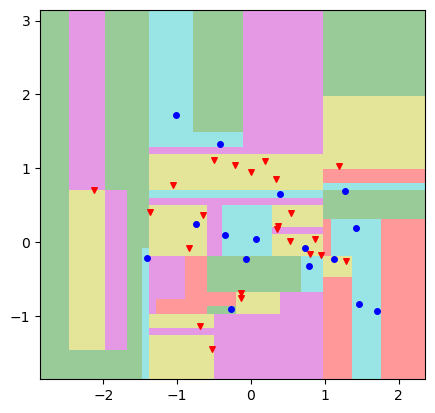

In [45]:
# FIX ME: try to match the point colors with their respective classes
plt.figure()
cmap = colors.ListedColormap(['y','c','g','m','r'])

plt.scatter(X[y==0,0], X[y==0,1], c='r', marker='v', s=16)
plt.scatter(X[y==1,0], X[y==1,1], c='b', marker='o', s=16)
plt.gca().set_aspect('equal')
plt.imshow(np.flip(grid_pred.reshape((xx_generator.shape[0],xx_generator.shape[1])), axis=0), extent=[x_min, x_max, y_min, y_max], cmap=cmap, alpha=0.4)
plt.show()